# setting up environment for working with netCDF4

first need to:
"conda install hdf4"

then:
"conda install netCDF4"

## tutorial from:

http://iuryt.github.io/tutorial/Como_fazer_um_mapa02.html

## modules and libraries

In [1]:
from netCDF4 import Dataset

In [2]:
#For labeling contours with text
import matplotlib.patheffects as PathEffects 

In [3]:
# numpy for maths
import numpy as np

In [4]:
# mapping module...
# conda install -c conda-forge basemap=1.0.8.dev0
from mpl_toolkits.basemap import Basemap

In [5]:
#for changing negative contours to solid lines
import matplotlib
matplotlib.rcParams['contour.negative_linestyle'] = 'solid' 

In [6]:
# for generating images
import matplotlib.pyplot as plt

In [7]:
#Colormap setup for standardizing commonly-plotting oceanographic variables
#conda install -c conda-forge cmocean
from cmocean import cm 

In [8]:
import pandas as pd

# Locations with siderophore TBDT containing SAGs

- BIGRAPA1
- BIGRAPA4
- BIGRAPA7
- GP13-22
- GP13-38
- GP13-GT19
- GRADIENT4
- GRADIENT6
- GRADIENT9
- HOT
- fiji
- marshall_islands

In [70]:
points = pd.read_csv('sags_locations.tsv', sep='\t')

In [71]:
sidero = points.loc[points['siderophore'] == 'yes']

In [72]:
nosidero = points.loc[points['siderophore'] == 'no']

In [73]:
nosidero.head()

,station,latitude,longitude,siderophore
4,BATS,31.07,-64.17,no
5,GA02-16,36.20,-53.31,no
6,GA02-35,9.55,-50.47,no
7,GA02-25,24.71,-67.07,no
8,GA03-07,24.00,-22.00,no


In [90]:
m = Basemap(projection='robin',lon_0=230)

In [91]:
xnone, ynone = m(nosidero['longitude'].values.tolist(), nosidero['latitude'].values.tolist())

In [92]:
xsid, ysid = m(sidero['longitude'].values.tolist(), sidero['latitude'].values.tolist())

# Create rasterized image of bathymetry. This can be overlaid manually using adobe illustrator

In [106]:
#read in the NOAA bathymetry data into a netCDF4 dataset
etopodata = Dataset('/Users/shane/Projects/ETOPO1_Bed_g_gmt4.nc')

In [107]:
# get coordinates from dataset
blon = etopodata.variables['lon'][:]
blat = etopodata.variables['lat'][:]
topoin = etopodata.variables['z']

# make bathymetry grid for plotting
bLON,bLAT = np.meshgrid(blon, blat)

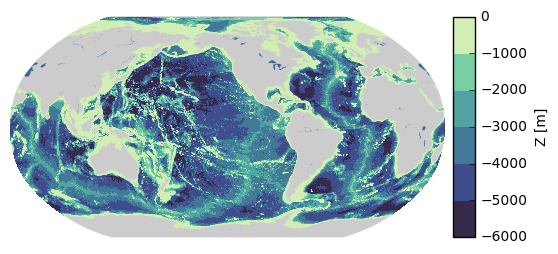

In [114]:
# map boundary colors
m.drawmapboundary(linewidth=0.5, color='#CCCCCC');

# Continent colors
m.fillcontinents(color='#CCCCCC', lake_color='#336699');

# Restrict depth to -6000 to 0 and plot at 1000m resolution. 
# Use the deep_r (r is for reverse) color scheme from cmocean
kw = dict(levels=range(-6000,0+100,1000), cmap=cm.deep_r, latlon=True)
CF = m.contourf(bLON, bLAT, BAT, zorder=1, **kw)
cbar = m.colorbar()
cbar.ax.set_ylabel('Z [m]')

plt.savefig('bathymetry_map.png', dpi=1200)

plt.show()

# Make map with siderophore locations

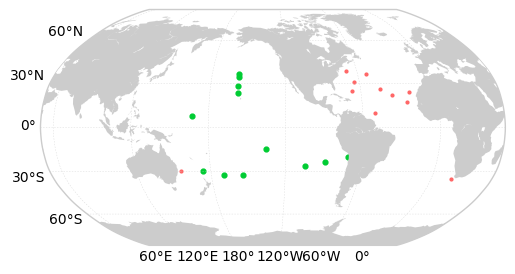

In [113]:
# map boundary colors
m.drawmapboundary(linewidth=1, color='#CCCCCC');

# Continent colors
m.fillcontinents(color='#CCCCCC', lake_color='#ffffff');

# draw lat and longitude lines
lbs = [1, 0, 0, 1]
m.drawmeridians(range(-180,180,60), labels=lbs, color='#CCCCCC', linewidth=0.25)
m.drawparallels(range(-90,90,30), labels=lbs, color='#CCCCCC', linewidth=0.25)

# plot locations of SAGs w and w/out siderophores
m.scatter(xnone, ynone, 4, marker='o', color='#FF6666')

m.scatter(xsid, ysid, 12, marker='o', color='#00CC33')

# create legend for points
plt.legend(fontsize=8, scatterpoints=1, loc='center')

plt.savefig('siderophore_map.eps')

plt.show()